In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
print(df.iloc[:,0:13:2])

      age  cp  chol  restecg  exang  slope  thal
0      52   0   212        1      0      2     3
1      53   0   203        0      1      0     3
2      70   0   174        1      1      0     3
3      61   0   203        1      0      2     3
4      62   0   294        1      0      1     2
...   ...  ..   ...      ...    ...    ...   ...
1020   59   1   221        1      1      2     2
1021   60   0   258        0      1      1     3
1022   47   0   275        0      1      1     2
1023   50   0   254        0      0      2     2
1024   54   0   188        1      0      1     3

[1025 rows x 7 columns]


In [7]:
x = df.iloc[:, 0:13:2].values

In [8]:
y=df['target'].values

In [9]:
y=y.reshape(y.shape[0],1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=23)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
list=[]
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test, y_pred)
  print(cm)
 
  from sklearn.metrics import accuracy_score
  score=accuracy_score(y_test,y_pred)
  print(score)
  list.append(score)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[[100   0]
 [  0 105]]
1.0
[[100   0]
 [  4 101]]
0.9804878048780488
[[100   0]
 [  4 101]]
0.9804878048780488
[[100   0]
 [ 27  78]]
0.8682926829268293
[[79 21]
 [20 85]]
0.8
[[88 12]
 [21 84]]
0.8390243902439024
[[84 16]
 [17 88]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.8390243902439024
[[89 11]
 [22 83]]
0.8390243902439024
[[84 16]
 [11 94]]
0.8682926829268293


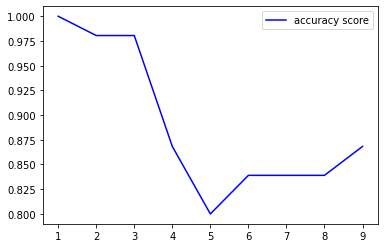

In [14]:
x=[1,2,3,4,5,6,7,8,9]

plt.plot(x,list,color='b',label='accuracy score')
plt.legend()
plt.show()